<a href="https://colab.research.google.com/github/Shahilasulthana/TensorFlow/blob/main/Loss_func_opt_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
np.random.seed(0)  # to generate random numbers starting from 0
X = np.linspace(0, 10, 100)
y = 2.5 * X + 5 + np.random.randn(*X.shape) * 2  # y = 2.5x + 5 + noise
# np.random.randn(*X.shape) -> Increases the deviation of the noise by 2 each time


In [3]:
X_tensor = tf.convert_to_tensor(X.reshape(-1, 1), dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y.reshape(-1, 1), dtype=tf.float32)

In [4]:
# Step 2: Define model parameters
# We are learning: y = W*x + b
W = tf.Variable(tf.random.normal([1, 1]))
b = tf.Variable(tf.random.normal([1]))

In [5]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05) # Defining optimizer function as Adamnoptimizer
mse_loss = tf.keras.losses.MeanSquaredError() # defining loss function as MSE

In [6]:
loss_history = []
epochs = 100

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X_tensor, W) + b
        loss = mse_loss(y_tensor, y_pred)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    loss_history.append(loss.numpy())

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.numpy():.4f}")


Epoch 10: Loss = 590.7986
Epoch 20: Loss = 444.0929
Epoch 30: Loss = 323.8869
Epoch 40: Loss = 229.2361
Epoch 50: Loss = 157.5266
Epoch 60: Loss = 105.2237
Epoch 70: Loss = 68.5157
Epoch 80: Loss = 43.7576
Epoch 90: Loss = 27.7395
Epoch 100: Loss = 17.8178


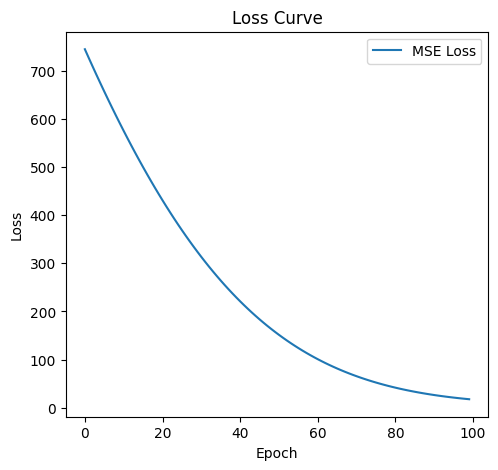

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_history, label='MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()


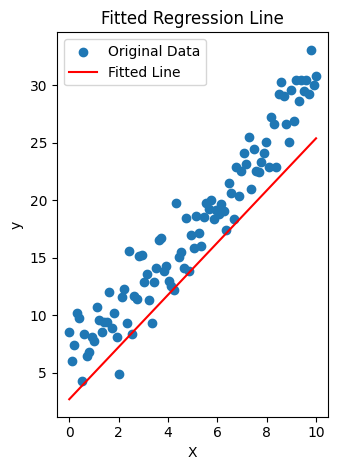

In [8]:
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Original Data')
y_fit = X * W.numpy()[0][0] + b.numpy()[0]
plt.plot(X, y_fit, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted Regression Line')
plt.legend()

plt.tight_layout()
plt.show()